### 基于dataset\training_set数据，根据提供的结构，建立CNN模型，识别图片中的猫/狗，计算预测准确率：
#### 1.识别图片中的猫/狗、计算dataset\test_set测试数据预测准确率
#### 2.从网站下载猫/狗图片，对其进行预测

#### 神经网络各层：

![cnn_structure](structure.jpg)

In [1]:
# 加载数据
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255)

train_set=datagen.flow_from_directory('./dataset/training_set',target_size=(50,50),batch_size=32,class_mode='binary')
train_set.class_indices

C:\Users\pactera\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 8000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [2]:
# CNN建模
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model=Sequential()

# 卷积层
model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation='relu'))  # filters,kernel_size(一个2位整数的整数或元组或列表，指定高度和宽度2D的卷积窗),
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))   # strides If None, it will default to pool_size.故而本次stride=2结果为24*24*32  【(48-2)/2+1=24】

# 卷积层
model.add(Conv2D(32,(3,3),activation='relu'))  
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))

# 压平 flatten layer
model.add(Flatten())

# 全连接层 FC
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))



In [3]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               495744    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [5]:
model.fit_generator(train_set,epochs=20)

Epoch 1/20
250/250 [==============================] - 68s 274ms/step - loss: 0.6681 - accuracy: 0.5796
Epoch 2/20
250/250 [==============================] - 31s 125ms/step - loss: 0.5771 - accuracy: 0.7006
Epoch 3/20
250/250 [==============================] - 31s 125ms/step - loss: 0.5169 - accuracy: 0.7487
Epoch 4/20
250/250 [==============================] - 34s 137ms/step - loss: 0.4744 - accuracy: 0.7738
Epoch 5/20
250/250 [==============================] - 32s 127ms/step - loss: 0.4240 - accuracy: 0.8049
Epoch 6/20
250/250 [==============================] - 32s 128ms/step - loss: 0.3818 - accuracy: 0.8244
Epoch 7/20
250/250 [==============================] - 34s 136ms/step - loss: 0.3560 - accuracy: 0.8405
Epoch 8/20
250/250 [==============================] - 34s 135ms/step - loss: 0.2922 - accuracy: 0.8800
Epoch 9/20
250/250 [==============================] - 38s 150ms/step - loss: 0.2561 - accuracy: 0.8911
Epoch 10/20
250/250 [==============================] - 32s 129ms/step - l

In [24]:
# 评估
acc_train=model.evaluate_generator(train_set)
print(acc_train)

[7.652456406503916e-05, 1.0]


In [25]:
test_set=datagen.flow_from_directory('./dataset/test_set',target_size=(50,50),batch_size=32,class_mode='binary')
acc_test=model.evaluate_generator(test_set)
print(acc_test)

Found 2000 images belonging to 2 classes.
[0.7050079703330994, 0.7645000219345093]


In [29]:
# 预测别处的小猫咪
from keras.preprocessing.image import load_img,img_to_array

pic_cat='haiwang2.jpg'
pic_cat=load_img(pic_cat,target_size=(50,50))
pic_cat=img_to_array(pic_cat)
pic_cat=pic_cat/255
pic_cat=pic_cat.reshape(1,50,50,3)
result=model.predict_classes(pic_cat)
print(result)

[[0]]


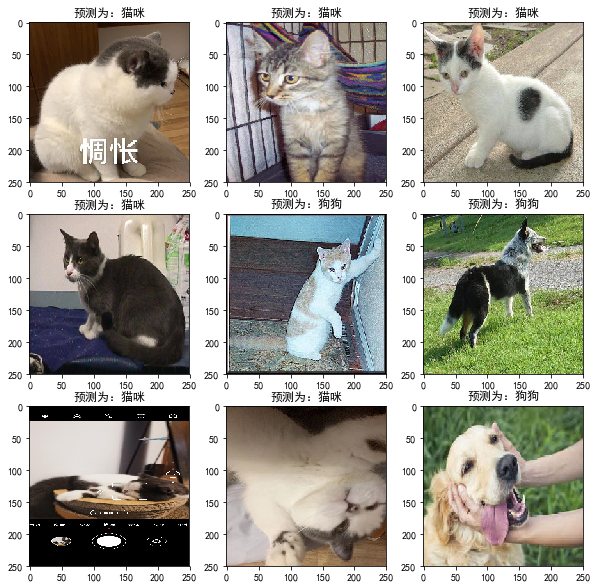

In [33]:
# make prediction on multiple images
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
a = [i for i in range(1,10)]
fig = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.jpg'
    img_ori = load_img(img_name, target_size=(50, 50))
    img = img_to_array(img_ori)
    img = img.astype('float32')/255
    img = img.reshape(1,50,50,3)
    result = model.predict_classes(img)
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫咪')
plt.show()